In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
###Determining the tone of the text of reviews of films from IMDb (Internet Movie Database)
max_words=10000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_words)

In [3]:
X_train[4] ###Words in review

[1,
 249,
 1323,
 7,
 61,
 113,
 10,
 10,
 13,
 1637,
 14,
 20,
 56,
 33,
 2401,
 18,
 457,
 88,
 13,
 2626,
 1400,
 45,
 3171,
 13,
 70,
 79,
 49,
 706,
 919,
 13,
 16,
 355,
 340,
 355,
 1696,
 96,
 143,
 4,
 22,
 32,
 289,
 7,
 61,
 369,
 71,
 2359,
 5,
 13,
 16,
 131,
 2073,
 249,
 114,
 249,
 229,
 249,
 20,
 13,
 28,
 126,
 110,
 13,
 473,
 8,
 569,
 61,
 419,
 56,
 429,
 6,
 1513,
 18,
 35,
 534,
 95,
 474,
 570,
 5,
 25,
 124,
 138,
 88,
 12,
 421,
 1543,
 52,
 725,
 6397,
 61,
 419,
 11,
 13,
 1571,
 15,
 1543,
 20,
 11,
 4,
 2,
 5,
 296,
 12,
 3524,
 5,
 15,
 421,
 128,
 74,
 233,
 334,
 207,
 126,
 224,
 12,
 562,
 298,
 2167,
 1272,
 7,
 2601,
 5,
 516,
 988,
 43,
 8,
 79,
 120,
 15,
 595,
 13,
 784,
 25,
 3171,
 18,
 165,
 170,
 143,
 19,
 14,
 5,
 7224,
 6,
 226,
 251,
 7,
 61,
 113]

In [4]:
y_train[4] ### 0 - bad, 1 - good

0

In [5]:
###The IMDB dataset uses word frequency coding. Download the dictionary used for coding
word_index = tf.keras.datasets.imdb.get_word_index()

In [6]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
###Transform the dictionary to receive the word by number
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

In [8]:
###Print the 20 most common words
for i in range(1, 21):
    print(i, '->', reverse_word_index[i])

1 -> the
2 -> and
3 -> a
4 -> of
5 -> to
6 -> is
7 -> br
8 -> in
9 -> it
10 -> i
11 -> this
12 -> that
13 -> was
14 -> as
15 -> for
16 -> with
17 -> movie
18 -> but
19 -> film
20 -> on


In [9]:
###Decode messages Service Codes: 
###0 - placeholder character
###1 - beginning of the sequence
###2 - unknown word
index = 4
message = ''
for code in X_train[index]:
    word = reverse_word_index.get(code - 3, '?')
    message += word + ' '
message

"? worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the ? and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life "

In [10]:
y_train[index]

0

In [11]:
###Training data preparation
maxlen = 200
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')

In [12]:
###Create neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [14]:
###Training
history = model.fit(X_train, 
                    y_train, 
                    epochs=50,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/50
176/176 [==============================] - 1s 3ms/step - loss: 118.3901 - accuracy: 0.5006 - val_loss: 45.9065 - val_accuracy: 0.4900
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 25.5715 - accuracy: 0.5304 - val_loss: 18.5550 - val_accuracy: 0.4920
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 8.6856 - accuracy: 0.5368 - val_loss: 7.9612 - val_accuracy: 0.4908
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 4.6623 - accuracy: 0.5238 - val_loss: 6.9912 - val_accuracy: 0.4832
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 3.4923 - accuracy: 0.5283 - val_loss: 8.9398 - val_accuracy: 0.4820
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 2.7623 - accuracy: 0.5295 - val_loss: 2.7983 - val_accuracy: 0.4872
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 2.4211 - accuracy: 0.5316 - val_loss: 3.3910 - val_accuracy: 0.4992
E

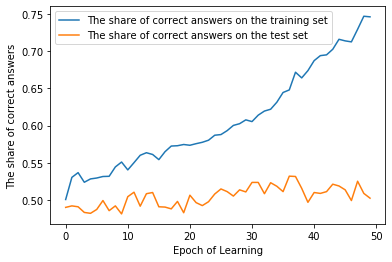

In [15]:
plt.plot(history.history['accuracy'], 
         label='The share of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The share of correct answers on the test set')
plt.xlabel('Epoch of Learning')
plt.ylabel('The share of correct answers')
plt.legend()
plt.show()

In [16]:
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 [==============================] - 1s 1ms/step - loss: 1.9657 - accuracy: 0.5034


In [51]:
print("Percentage of correct answers on test data:", round(scores[1] * 100, 4))

Percentage of correct answers on test data: 50.924


One hot encoding

In [52]:
###Function for encoding "one hot encoding"
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [54]:
X_train = vectorize_sequences(X_train, max_words)
X_test = vectorize_sequences(X_test, max_words)

In [57]:
X_train[4][:50]

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])

In [58]:
y_train[4]

0

In [60]:
###Model creation
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(max_words,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [61]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [62]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 2s 13ms/step - loss: 0.3447 - accuracy: 0.8521 - val_loss: 0.2975 - val_accuracy: 0.8764
Epoch 2/10
176/176 [==============================] - 2s 12ms/step - loss: 0.1813 - accuracy: 0.9307 - val_loss: 0.3271 - val_accuracy: 0.8728
Epoch 3/10
176/176 [==============================] - 2s 12ms/step - loss: 0.1021 - accuracy: 0.9632 - val_loss: 0.3843 - val_accuracy: 0.8692
Epoch 4/10
176/176 [==============================] - 2s 12ms/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.5395 - val_accuracy: 0.8636
Epoch 5/10
176/176 [==============================] - 2s 12ms/step - loss: 0.0078 - accuracy: 0.9983 - val_loss: 0.6524 - val_accuracy: 0.8692
Epoch 6/10
176/176 [==============================] - 2s 12ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.7753 - val_accuracy: 0.8684
Epoch 7/10
176/176 [==============================] - 2s 12ms/step - loss: 4.1022e-04 - accuracy: 1.0000 - val_loss: 0.8345 - val_accuracy: 0.

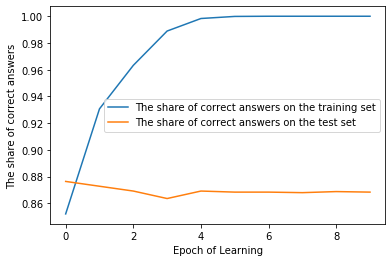

In [63]:
plt.plot(history.history['accuracy'], 
         label='The share of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The share of correct answers on the test set')
plt.xlabel('Epoch of Learning')
plt.ylabel('The share of correct answers')
plt.legend()
plt.show()

In [64]:
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 [==============================] - 2s 2ms/step - loss: 1.0000 - accuracy: 0.8504


In [65]:
print("Percentage of correct answers on test data:", round(scores[1] * 100, 4))

Percentage of correct answers on test data: 85.036


Embedding

In [80]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, 2, input_length=maxlen))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [81]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [82]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5043 - val_loss: 0.6918 - val_accuracy: 0.5160
Epoch 2/15
176/176 [==============================] - 1s 4ms/step - loss: 0.6805 - accuracy: 0.6096 - val_loss: 0.6617 - val_accuracy: 0.6740
Epoch 3/15
176/176 [==============================] - 1s 4ms/step - loss: 0.5718 - accuracy: 0.7623 - val_loss: 0.4902 - val_accuracy: 0.8076
Epoch 4/15
176/176 [==============================] - 1s 4ms/step - loss: 0.4100 - accuracy: 0.8436 - val_loss: 0.3875 - val_accuracy: 0.8460
Epoch 5/15
176/176 [==============================] - 1s 4ms/step - loss: 0.3285 - accuracy: 0.8764 - val_loss: 0.3437 - val_accuracy: 0.8620
Epoch 6/15
176/176 [==============================] - 1s 4ms/step - loss: 0.2860 - accuracy: 0.8914 - val_loss: 0.3237 - val_accuracy: 0.8648
Epoch 7/15
176/176 [==============================] - 1s 4ms/step - loss: 0.2566 - accuracy: 0.9038 - val_loss: 0.3060 - val_accuracy: 0.8792
Epoch 

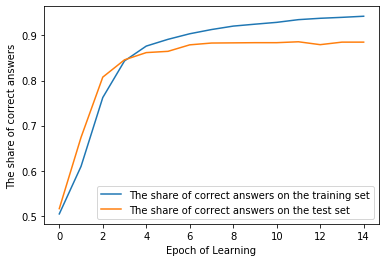

In [83]:
plt.plot(history.history['accuracy'], 
         label='The share of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The share of correct answers on the test set')
plt.xlabel('Epoch of Learning')
plt.ylabel('The share of correct answers')
plt.legend()
plt.show()

In [84]:
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 [==============================] - 1s 996us/step - loss: 0.3015 - accuracy: 0.8732


In [85]:
print("Percentage of correct answers on test data:", round(scores[1] * 100, 4))

Percentage of correct answers on test data: 87.32


In [105]:
###Get a matrix of word embending
embedding_matrix = model.layers[0].get_weights()[0]

In [87]:
embedding_matrix[:5]

array([[-0.00152661, -0.00680743],
       [-0.1632782 ,  0.13320994],
       [ 0.00091396,  0.06831004],
       [-0.03621567, -0.0457374 ],
       [ 0.02033485, -0.03243604]], dtype=float32)

In [89]:
###Dictionary with word's numbers
word_index_org = tf.keras.datasets.imdb.get_word_index()

In [91]:
###supplement the dictionary with service characters
word_index = dict()
for word,number in word_index_org.items():
    word_index[word] = number + 3
word_index["<placeholder>"] = 0
word_index["<beginning of the sequence>"] = 1
word_index["<unknown word>"] = 2  
word_index["<not used>"] = 3

In [94]:
###Vectors for words
word = 'good'
word_number = word_index[word]
print('Number of word', word_number)
print('Vector for word', embedding_matrix[word_number])

Number of word 52
Vector for word [ 0.21364273 -0.08923092]


In [95]:
###Save trained dense vector representations into a file
###Compose a reverse dictionary of tokens (words)
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

In [96]:
###Write dense vector representations into a file
filename = 'imdb_embeddings.csv'

In [98]:
with open(filename, 'w', encoding="utf-8") as f:
    for word_num in range(max_words):
      word = reverse_word_index[word_num]
      vec = embedding_matrix[word_num]
      f.write(word + ",")
      f.write(','.join([str(x) for x in vec]) + "\n")

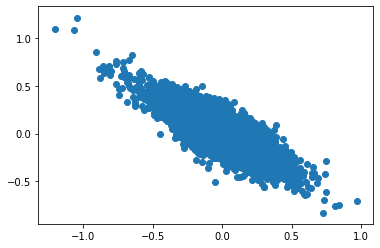

In [104]:
###Visualization of word embending
plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1])

In [101]:
###Select the word codes by which you can determine the tonality of the review
review = ['brilliant', 'fantastic', 'amazing', 'good',
          'bad', 'awful','crap', 'terrible', 'trash']
enc_review = []
for word in review:
    enc_review.append(word_index[word])
enc_review

[530, 777, 480, 52, 78, 373, 595, 394, 1157]

In [102]:
###Get a vector representation of the words
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[ 0.5363494 , -0.4180352 ],
       [ 0.6924771 , -0.46055755],
       [ 0.546333  , -0.56703705],
       [ 0.21364273, -0.08923092],
       [-0.46937752,  0.48682418],
       [-1.0686121 ,  1.09085   ],
       [-0.5304357 ,  0.5804234 ],
       [-0.80539006,  0.6099671 ],
       [-0.2308824 ,  0.18716215]], dtype=float32)

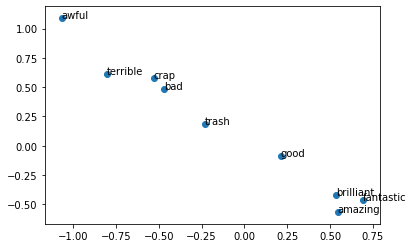

In [103]:
###Visualization of a trained dense vector representation of words
plt.scatter(review_vectors[:,0], review_vectors[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (review_vectors[i,0], review_vectors[i,1]))

Recurrence model

In [114]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, 2, input_length=maxlen))
model.add(tf.keras.layers.SimpleRNN(8))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [115]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [116]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 5s 30ms/step - loss: 0.6527 - accuracy: 0.6231 - val_loss: 0.5989 - val_accuracy: 0.7084
Epoch 2/15
176/176 [==============================] - 5s 29ms/step - loss: 0.5117 - accuracy: 0.7886 - val_loss: 0.4461 - val_accuracy: 0.8268
Epoch 3/15
176/176 [==============================] - 5s 29ms/step - loss: 0.3969 - accuracy: 0.8514 - val_loss: 0.3916 - val_accuracy: 0.8448
Epoch 4/15
176/176 [==============================] - 5s 29ms/step - loss: 0.3334 - accuracy: 0.8742 - val_loss: 0.3550 - val_accuracy: 0.8508
Epoch 5/15
176/176 [==============================] - 5s 30ms/step - loss: 0.3008 - accuracy: 0.8836 - val_loss: 0.3300 - val_accuracy: 0.8672
Epoch 6/15
176/176 [==============================] - 5s 31ms/step - loss: 0.2730 - accuracy: 0.8953 - val_loss: 0.3334 - val_accuracy: 0.8684
Epoch 7/15
176/176 [==============================] - 5s 30ms/step - loss: 0.2525 - accuracy: 0.9031 - val_loss: 0.3700 - val_accuracy: 0.8616

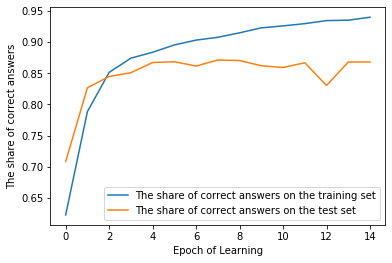

In [118]:
plt.plot(history.history['accuracy'], 
         label='The share of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The share of correct answers on the test set')
plt.xlabel('Epoch of Learning')
plt.ylabel('The share of correct answers')
plt.legend()
plt.show()

In [119]:
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 [==============================] - 6s 7ms/step - loss: 0.4438 - accuracy: 0.8491


In [120]:
print("Percentage of correct answers on test data:", round(scores[1] * 100, 4))

Percentage of correct answers on test data: 84.908
